**Ume Taqadus**

**WEEK 1**




---
TASK 1


---




**Import libraries**

In [46]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

**Load California Housing Dataset**

In [26]:
data=fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

**Convert to DataFrame**

In [27]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Split data into features and label**

In [30]:
X=df.drop('Target',axis=1)
y=df['Target']

**Split Data into training and test sets(80-20)**

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Train Linear Regression**

In [35]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Predictions on Test Data**

In [44]:
y_predicted=model.predict(X_test)
y_predicted

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

**Evaluation**

In [47]:
mse=mean_squared_error(y_test,y_predicted)
r2=r2_score(y_test,y_predicted)

print("MSE: ",mse)
print("R2 Score: ",r2)

MSE:  0.5558915986952444
R2 Score:  0.5757877060324508




---
**TASK 2**


---




**Import extra libraries**

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Load Dtaset from Github

In [52]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Clean Data**

In [53]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) #drop columns


In [55]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [61]:
df['Age']=df['Age'].fillna(df['Age'].median()) #numerical data
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0]) #Categorical Dta

In [62]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


**Encode categorical data**

In [65]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

**Split features and Target**

In [66]:
X=df.drop('Survived',axis=1)
y=df['Survived']

**Train Test Split**

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Train Model**

In [69]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

**Make Predictions**

In [72]:
y_predicted=model.predict(X_test)

**Evaluate**

In [73]:
accuracy=accuracy_score(y_test,y_predicted)
conf_matrix=confusion_matrix(y_test,y_predicted)

print("Accuracy: ",accuracy)
print("Confusion Matrix: ",conf_matrix)

Accuracy:  0.7932960893854749
Confusion Matrix:  [[87 18]
 [19 55]]


**Plot Confusion Mtarix**

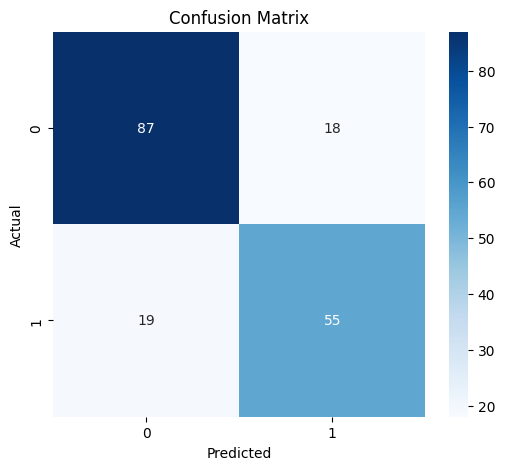

In [76]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Plot Accuracy Score**

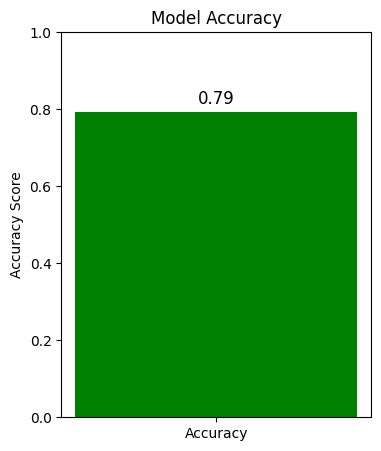

In [77]:
plt.figure(figsize=(4, 5))
plt.bar(['Accuracy'], [accuracy], color='green')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.text(0, accuracy + 0.02, f'{accuracy:.2f}', ha='center', fontsize=12)
plt.show()



---



*This week, I learned how to work with real-world datasets for both regression and classification tasks using scikit-learn. I explored the California Housing dataset to predict house prices using Linear Regression and evaluated the model using metrics like Mean Squared Error and R² Score. I also worked with the Titanic dataset to predict passenger survival by cleaning the data, handling missing values, encoding categorical variables, and training a Decision Tree Classifier. Finally, I visualized model performance using accuracy scores and confusion matrices, which helped me better understand how well the models were performing and how to interpret the results.*




---

